In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [6]:
# Load your data
data = pd.read_csv('Datasets/delhi_Data.csv', parse_dates=[0], index_col=0)

# Convert the date column to datetime format
# data['date'] = pd.to_datetime(data['date'])

# Set the date column as the index
# data.set_index('date', inplace=True)

# Display the first few rows of the DataFrame
data = data['pm2.5']
print(data.head())


2024-03-04    125.0
2024-03-03    102.0
2024-03-02    181.0
2024-02-29    145.0
2024-02-28    149.0
Name: pm2.5, dtype: float64


In [7]:
# Create an instance of the ARIMA model
model = ARIMA(data, order=(1, 1, 1))

# Fit the model to your data
model_fit = model.fit()

# Display the summary of the model fit
print(model_fit.summary())


C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

                               SARIMAX Results                                
Dep. Variable:                  pm2.5   No. Observations:                 2086
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10870.060
Date:                Wed, 06 Mar 2024   AIC                          21746.119
Time:                        09:46:57   BIC                          21763.047
Sample:                             0   HQIC                         21752.322
                               - 2086                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5525      0.019     29.644      0.000       0.516       0.589
ma.L1         -0.8907      0.013    -67.064      0.000      -0.917      -0.865
sigma2      1975.4699     25.812     76.532      0.0

In [8]:
# Make forecasts
forecast = model_fit.forecast(steps=10)

# Display the forecast
print(forecast)


2086    299.101334
2087    290.870400
2088    286.323129
2089    283.810938
2090    282.423050
2091    281.656296
2092    281.232694
2093    280.998670
2094    280.869381
2095    280.797954
Name: predicted_mean, dtype: float64


C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


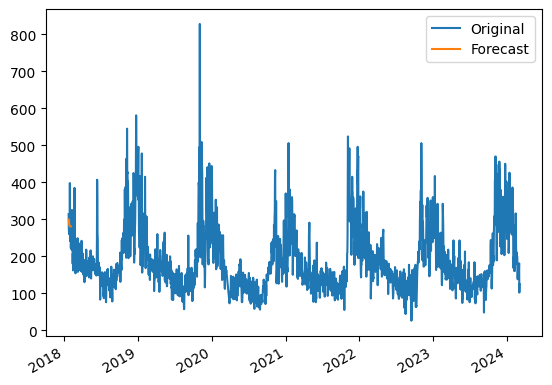

In [9]:
# Plot the original data
data.plot(label='Original')

# Plot the forecast
plt.plot(pd.date_range(start=data.index[-1], periods=11, freq='D')[1:], forecast, label='Forecast')

# Add a legend and show the plot
plt.legend()
plt.show()


In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Assuming `data` is your time series data
data = np.array(data).reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Split the data into training and test sets
train_size = int(len(data) * 0.8)
train, test = data[0:train_size, :], data[train_size:len(data), :]

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Reshape the data to fit the LSTM input shape
X_train = train[:, :-1]
y_train = train[:, -1]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions
X_test = test[:, :-1]
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
predictions = model.predict(X_test)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(test[:, -1], predictions))
print(f"RMSE: {rmse}")


ValueError: in user code:

    File "C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "lstm" is incompatible with the layer: expected shape=(None, None, 1), found shape=(None, 1, 0)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1, 0), dtype=float32)
      • training=True
      • mask=None
